# Data Exploration

### Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [3]:
data_raw =  list(parseJson('archive-2/Sarcasm_Headlines_Dataset_v2.json'))

In [4]:
data_raw[:5]

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [5]:
len(data_raw)

28619

In [6]:
data = pd.DataFrame(data_raw)
data = data.drop('article_link', axis=1)
data.head(5)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [7]:
data_split = data.copy()
data_split['headline'] = data_split['headline'].apply(lambda x: x.split())
data_split.head(5)

,is_sarcastic,headline
0,1,"[thirtysomething, scientists, unveil, doomsday..."
1,0,"[dem, rep., totally, nails, why, congress, is,..."
2,0,"[eat, your, veggies:, 9, deliciously, differen..."
3,1,"[inclement, weather, prevents, liar, from, get..."
4,1,"[mother, comes, pretty, close, to, using, word..."


### Visualize

In [8]:
words_not_sarc = data_split[data_split['is_sarcastic'] == 0]['headline'].values.tolist()
words_sarc = data_split[data_split['is_sarcastic'] == 1]['headline'].values.tolist()
                                                 
words_not_sarc = [item for sublist in words_not_sarc for item in sublist]
words_sarc = [item for sublist in words_sarc for item in sublist]

#### Word Clouds

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

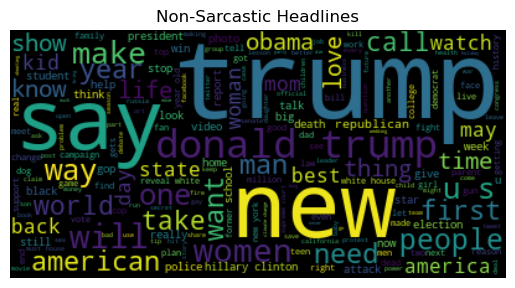

In [10]:
wordcloud = WordCloud().generate(" ".join(words_not_sarc))
plt.title('Non-Sarcastic Headlines')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

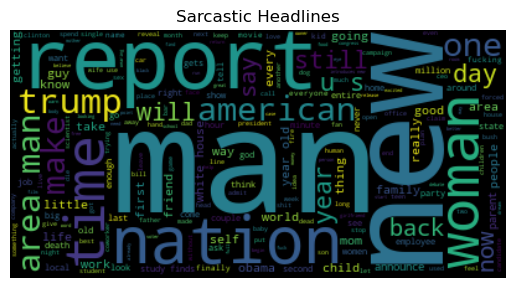

In [11]:
wordcloud = WordCloud().generate(" ".join(words_sarc))
plt.title('Sarcastic Headlines')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Vocabularies

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer_sarc = CountVectorizer(input = 'content',
                            max_features = 5000)

vectorizer_not_sarc = CountVectorizer(input = 'content',
                            max_features = 5000)

In [14]:
sarc = vectorizer_sarc.fit_transform(words_sarc)
nonsarc = vectorizer_not_sarc.fit_transform(words_not_sarc)

In [15]:
vocab_sarc = vectorizer_sarc.get_feature_names_out()
vocab_not_sarc = vectorizer_not_sarc.get_feature_names_out()

In [16]:
count = 0
word_list = []
for word in vocab_sarc:
    if word in vocab_not_sarc:
        count += 1
        word_list.append(word)
count

3229

(-0.5, 399.5, 199.5, -0.5)

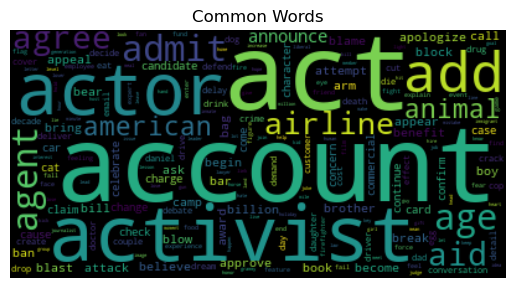

In [17]:
wordcloud = WordCloud().generate(" ".join(word_list))
plt.title('Common Words')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Modeling

In [18]:
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

2022-11-29 16:58:49.240823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['is_sarcastic'], test_size=0.2, random_state=2)

In [20]:
X_train[0]

'thirtysomething scientists unveil doomsday clock of hair loss'

In [21]:
print('distribution of labels in test set is: \n', sum(y_test)/len(y_test))
print('distribution of labels in train set is: \n', sum(y_train)/len(y_train))

distribution of labels in test set is: 
 0.4781621243885395
distribution of labels in train set is: 
 0.475955448787945


In [22]:
print('This is the size of the training set: ', len(X_train))
print('This is the size of the testing set: ', len(X_test))

This is the size of the training set:  22895
This is the size of the testing set:  5724


In [23]:
train_words = [item for sublist in X_train for item in sublist.split()]

In [24]:
max_length = len(max(data_split['headline']))
print('maximum length of input sentences is :', max_length)
max_feature = 4000
print('vocab size will be : ', max_feature)

maximum length of input sentences is : 14
vocab size will be :  4000


In [25]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [26]:
vectorizer = CountVectorizer(input = 'content',
                            preprocessor=preprocess_text,
                            max_features = max_feature)
                            #stop_words= ['a', '])
words = vectorizer.fit_transform(train_words)
vocab = vectorizer.get_feature_names_out()

In [27]:
vocab[:50]

array(['aaron', 'abandoned', 'abc', 'ability', 'able', 'abortion',
       'about', 'above', 'abrams', 'abroad', 'absence', 'absolutely',
       'abuse', 'abused', 'abusive', 'academy', 'accept', 'acceptance',
       'accepting', 'accepts', 'access', 'accident', 'accidentally',
       'according', 'account', 'accusations', 'accused', 'accusers',
       'accuses', 'achieve', 'acquires', 'across', 'act', 'acting',
       'action', 'activist', 'activists', 'actor', 'actors', 'actress',
       'acts', 'actual', 'actually', 'ad', 'adam', 'add', 'added',
       'addiction', 'adding', 'address'], dtype=object)

In [28]:
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=max_feature+2,
 output_mode='int',
 output_sequence_length=max_length,
 vocabulary=vocab)

2022-11-29 17:00:01.223930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
print('example raw input: \n', X_train[0])
print('example tokenized using TextVectorization: \n', vectorize_layer(X_train[0]))

example raw input: 
 thirtysomething scientists unveil doomsday clock of hair loss
example tokenized using TextVectorization: 
 tf.Tensor([   1 3110    1    1  679 2462 1594 2127    0    0    0    0    0    0], shape=(14,), dtype=int64)


In [30]:
input_seq = tf.keras.Input(shape=(1,), dtype=tf.string)

embedding = tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()),
                                     output_dim=150)
                                     #mask_zero=True) # allow for variable input length

#lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))

lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True, dropout=0.25))
lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(10, dropout=0.5))
dense1 = tf.keras.layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))
drop_out = tf.keras.layers.Dropout(0.5)
dense2 = tf.keras.layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))
result = tf.keras.layers.Dense(1)

In [31]:
model_headlines = tf.keras.Sequential()
model_headlines.add(input_seq)
model_headlines.add(vectorize_layer)
model_headlines.add(embedding)
model_headlines.add(lstm1)
model_headlines.add(lstm2)
model_headlines.add(dense1)
model_headlines.add(drop_out)
model_headlines.add(dense2)
model_headlines.add(drop_out)
model_headlines.add(result)


model_headlines.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [32]:
model_headlines.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 14)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 14, 150)           600300    
                                                                 
 bidirectional (Bidirectiona  (None, 14, 128)          82944     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               8400      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                672       
                                                        

In [33]:
history = model_headlines.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Epoch 1/10
716/716 [==============================] - 28s 30ms/step - loss: 0.7581 - accuracy: 0.5166 - val_loss: 0.7134 - val_accuracy: 0.5218
Epoch 2/10
716/716 [==============================] - 20s 28ms/step - loss: 0.6796 - accuracy: 0.6016 - val_loss: 0.6009 - val_accuracy: 0.7259
Epoch 3/10
716/716 [==============================] - 20s 28ms/step - loss: 0.5942 - accuracy: 0.6923 - val_loss: 0.5418 - val_accuracy: 0.8194
Epoch 4/10
716/716 [==============================] - 21s 29ms/step - loss: 0.5375 - accuracy: 0.7513 - val_loss: 0.5080 - val_accuracy: 0.8148
Epoch 5/10
716/716 [==============================] - 21s 29ms/step - loss: 0.5003 - accuracy: 0.7849 - val_loss: 0.4839 - val_accuracy: 0.8307
Epoch 6/10
716/716 [==============================] - 21s 29ms/step - loss: 0.4689 - accuracy: 0.8085 - val_loss: 0.4702 - val_accuracy: 0.8311
Epoch 7/10
716/716 [==============================] - 21s 29ms/step - loss: 0.4432 - accuracy: 0.8311 - val_loss: 0.4663 - val_accuracy:

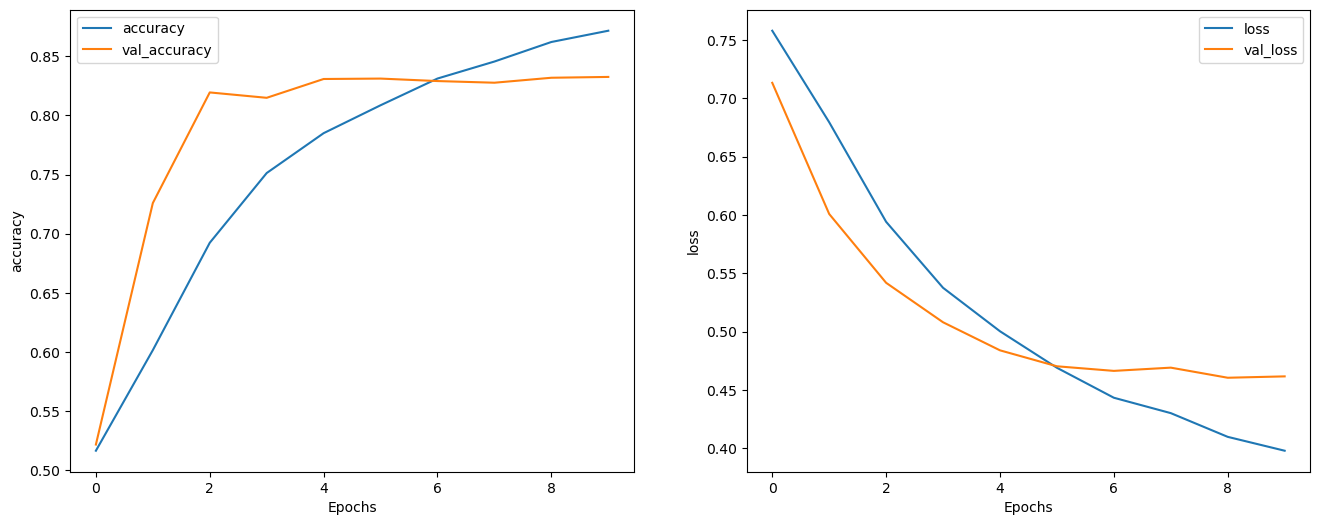

In [34]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])

In [35]:
model_headlines.evaluate(X_test, y_test)

179/179 [==============================] - 1s 6ms/step - loss: 0.4616 - accuracy: 0.8325


[0.46156200766563416, 0.8324598073959351]

In [36]:
prediction = model_headlines.predict(X_test)
prediction

179/179 [==============================] - 2s 6ms/step


array([[-1.9443791],
       [-1.525502 ],
       [ 1.8032701],
       ...,
       [ 1.776705 ],
       [ 1.7913089],
       [-1.9875166]], dtype=float32)

In [37]:
prediction[prediction <= 0] = 0
prediction[prediction > 0] = 1
confusion_matrix(prediction,  y_test)

array([[2464,  432],
       [ 523, 2305]])

# Current News Headlines

In [38]:
url = ['https://www.theonion.com/biden-meets-with-turkeys-who-ve-lost-loved-ones-to-than-1849801993',
       'https://www.theonion.com/cash-flush-fifa-executives-note-every-world-cup-host-ha-1849781289',
       'https://www.theonion.com/mom-urges-family-members-not-to-fight-turkey-again-this-1849787839',
       'https://www.theonion.com/rihanna-admits-she-just-uses-whatever-makeup-on-sale-at-1849797385',
       'https://www.theonion.com/police-team-building-scavenger-hunt-challenges-officers-1849797280',
      'https://www.nytimes.com/2022/11/23/magazine/white-noise-noah-baumbach.html',
      'https://www.nytimes.com/live/2022/11/23/sports/world-cup-scores',
      'https://www.nytimes.com/2022/11/23/nyregion/illegal-weed-dispensaries-shops-nyc.html',
      'https://www.nytimes.com/2022/11/17/business/spacex-workers-elon-musk.html',
      'https://www.nytimes.com/2022/11/23/arts/design/dinosaur-bones-market-auction.html']
       
headlines = ['Biden Meets With Turkeys Who’ve Lost Loved Ones To Thanksgiving', 
             'Cash-Flush FIFA Executives Note Every World Cup Host Has Had Slaves At One Point',
             'Mom Urges Family Members Not To Fight Turkey Again This Year',
             'Rihanna Admits She Just Uses Whatever Makeup On Sale At Walgreens',
             'Police Team-Building Scavenger Hunt Challenges Officers To Arrest Someone From Every Race',
            'How Noah Baumbach Made ‘White Noise’ a Disaster Movie for Our Moment',
            'Germany Was Stunned by Japan; Spain Did Not Have the Same Problem',
            'How New York City Became a Free-for-All of Unlicensed Weed',
            'SpaceX Employees Say They Were Fired for Speaking Up About Elon Musk',
            'The Dinosaur Bone Market Is Booming. It Also Has Growing Pains.']
label = [1,1,1,1,1,0,0,0,0,0]

current_headlines = pd.DataFrame({'label':label, 'headlines':headlines, 'url':url})

In [39]:
current_headlines.head(5)

,label,headlines,url
0,1,Biden Meets With Turkeys Who’ve Lost Loved One...,https://www.theonion.com/biden-meets-with-turk...
1,1,Cash-Flush FIFA Executives Note Every World Cu...,https://www.theonion.com/cash-flush-fifa-execu...
2,1,Mom Urges Family Members Not To Fight Turkey A...,https://www.theonion.com/mom-urges-family-memb...
3,1,Rihanna Admits She Just Uses Whatever Makeup O...,https://www.theonion.com/rihanna-admits-she-ju...
4,1,Police Team-Building Scavenger Hunt Challenges...,https://www.theonion.com/police-team-building-...


In [40]:
current_headlines_x = current_headlines['headlines']
current_headlines_y = current_headlines['label']

In [41]:
prediction_current = model_headlines.predict(current_headlines_x)

1/1 [==============================] - 0s 28ms/step


In [42]:
prediction_current[prediction_current <= 0] = 0
prediction_current[prediction_current > 0] = 1
confusion_matrix(prediction_current,  current_headlines_y)

array([[4, 1],
       [1, 4]])

In [43]:
prediction_current

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

# Reddit Comments

In [44]:
data_comments = pd.read_csv('archive-3/train-balanced-sarcasm.csv')
data_comments.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [45]:
data_comments = data_comments[['label', 'comment']]
data_comments.head(5)

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


In [46]:
for index, row in data_comments.iterrows():
    try:
        row['comment'].split()
    except:
        data_comments.drop(index, axis=0, inplace=True)

In [47]:
data_split_comments = data_comments.copy()
data_split_comments['comment'] = data_split_comments['comment'].apply(lambda x: x.split())
data_split_comments['size'] = data_split_comments['comment'].apply(lambda x: len(x))
data_split_comments = data_split_comments[data_split_comments['size'] > 3]
data_split_comments = data_split_comments[data_split_comments['size'] < 15]
data_split_comments['comment'] = data_split_comments['comment'].apply(lambda x: " ".join(x))

In [48]:
comments_sample = data_split_comments.sample(frac=.05, random_state=2)
len(comments_sample)

31524

In [49]:
comments_x = comments_sample['comment']
comments_y = comments_sample['label']

In [50]:
prediction_comments = model_headlines.predict(comments_x)

986/986 [==============================] - 6s 6ms/step


In [58]:
prediction_comments[prediction_comments <= 0] = 0
prediction_comments[prediction_comments > 0] = 1
confusion_matrix(prediction_comments,  comments_y)

array([[ 9993, 12082],
       [ 4447,  5002]])

In [59]:
prediction_comments

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [60]:
comment_pred = pd.DataFrame({'prediction':prediction_comments.flatten().tolist(), 'truth': comments_y, 'comment':comments_x})
comment_pred

,prediction,truth,comment
954800,0.0,1,The shootings MUST be promoted by the violence in video games...
989469,1.0,1,Not writing articles about movies that's for sure.
190249,1.0,1,Good to see he has his priorities right
285792,0.0,0,That's not how you ride a bike
729353,0.0,1,Because a racist name means I can't give advice.
...,...,...,...
361054,0.0,1,"Guns kill people, you know."
445196,0.0,1,Or just bring gold bricks and skip the gubmint issued paper placeholders
23272,1.0,0,He's not a parody of any one specific character from anything.
296683,0.0,0,Stop being a fucking idiot and get on with it!


In [61]:
comment_pred['correct'] = (comment_pred['truth']==comment_pred['prediction']).astype(int)

In [62]:
incorrect = comment_pred[comment_pred['correct'] == False]

In [63]:
pd.set_option('max_colwidth', 400)
incorrect.sample(frac=.001, random_state=3)

,prediction,truth,comment,correct
230277,0.0,1,"Excuse me while I go cry myself to sleep over such devastating news,",0
335448,0.0,1,"yeah, beer brewers and tobacco growers belong in prison!",0
103279,0.0,1,"Gaah, I KNEW he shouldn't have played in the world cup...",0
587393,0.0,1,Let me guess Republicans came up with this common sense idea?,0
522923,0.0,1,Because we all know Kyle's dad would fit in so well out in Cali...,0
362952,0.0,1,post of the year mate,0
694016,0.0,1,It's cause he's bad at finances lololololololololol,0
331151,0.0,1,what a thoughtful retort,0
452900,0.0,1,"Also, fun fact, Hawaii is majority straight white males",0
50936,1.0,0,There goes Rosberg's championship...,0


In [64]:
sum(comment_pred['truth'])

17084

In [65]:
len(comment_pred['truth'])

31524